In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv('disease_symptom_prediction.csv')
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Symptoms Dataset Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("symptoms_data_profiling_report.html")

# Display the report in Jupyter Notebook
profile.to_notebook_iframe()

/Users/carlosvarela/anaconda3/envs/final_project/lib/python3.11/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df_no_duplicates = df.copy().drop_duplicates()

In [5]:
# Lowercase text in relevant columns:

df_no_duplicates_lower = df_no_duplicates.apply(lambda x: x.str.lower())

Getting the frequency of each symptom to find top 10 symptoms by occurence.

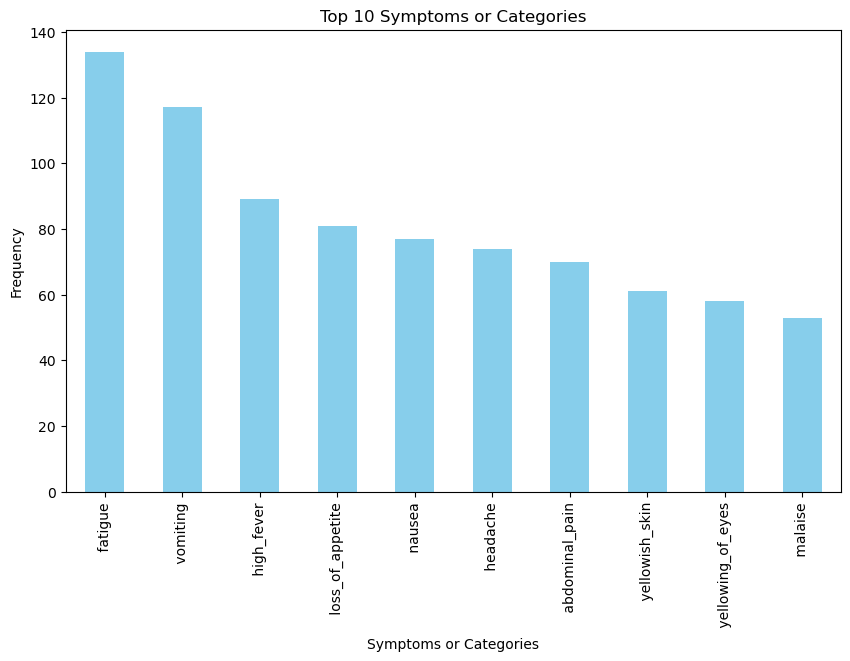

In [6]:
symptoms_df = df_no_duplicates.drop('Disease', axis=1)

# Count the occurrences of each symptom
symptom_counts = symptoms_df.apply(pd.Series.value_counts).sum(axis=1)

# Sort the symptoms based on their counts in descending order
top_symptoms = symptom_counts.sort_values(ascending=False).head(10)

# Plot the top 10 symptoms
plt.figure(figsize=(10, 6))
top_symptoms.plot(kind='bar', color='skyblue')
plt.title('Top 10 Symptoms or Categories')
plt.xlabel('Symptoms or Categories')
plt.ylabel('Frequency')
plt.show()